# IRIS Flowers Classification ML Project

Performer-** Naman Sahu**

In [122]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as npy
import os
import warnings
warnings.filterwarnings('ignore')

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
df = pd.read_csv("/content/drive/MyDrive/data/iris-write-from-docker.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [127]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualisation of Data...

In [128]:
species=list(df['class'].head(100))
Sepal_Length=list(df['sepal_length'].head(100))
Sepal_Width=list(df['sepal_width'].head(100))
Petal_Length=list(df['petal_length'].head(100))    
Petal_Width=list(df['petal_width'].head(100))   
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

<BarContainer object of 100 artists>

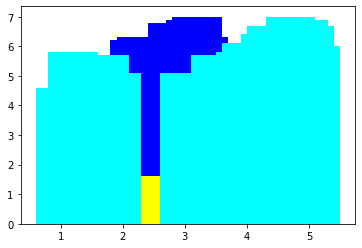

In [129]:
plt.bar(Sepal_Width,Sepal_Length,color="blue")
plt.bar(Sepal_Width,Petal_Width,color="yellow")
plt.bar(Petal_Length,Sepal_Length,color="cyan")

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

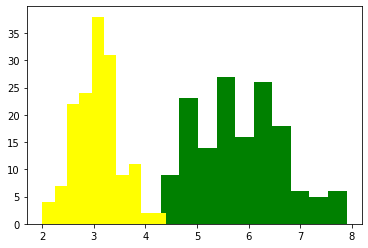

In [130]:
plt.hist(df['sepal_length'],color='green',)
plt.hist(df['sepal_width'],color='yellow')

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

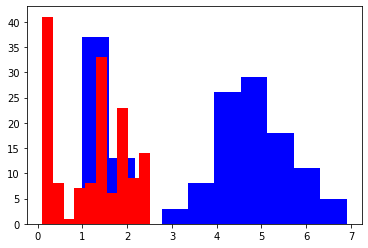

In [131]:
plt.hist(df['petal_length'],color='blue')
plt.hist(df['petal_width'],color='red')

In [132]:
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
colors = ['red', 'green', 'skyblue']

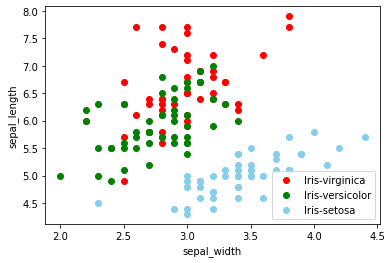

In [133]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_width'], x['sepal_length'], c = colors[i], label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("sepal_length")
plt.legend()

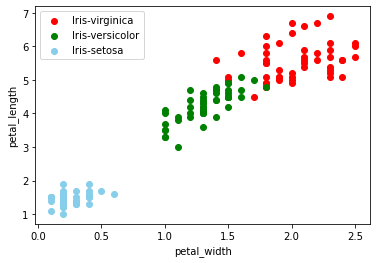

In [134]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['petal_width'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.legend()

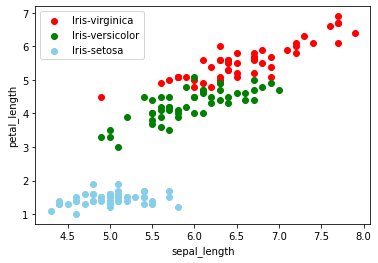

In [135]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

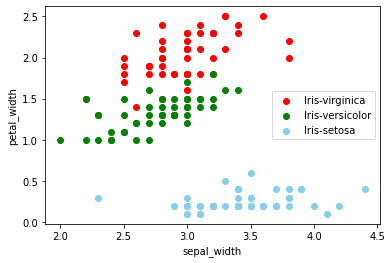

In [136]:
for i in range(3):
    x = df[df['class'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

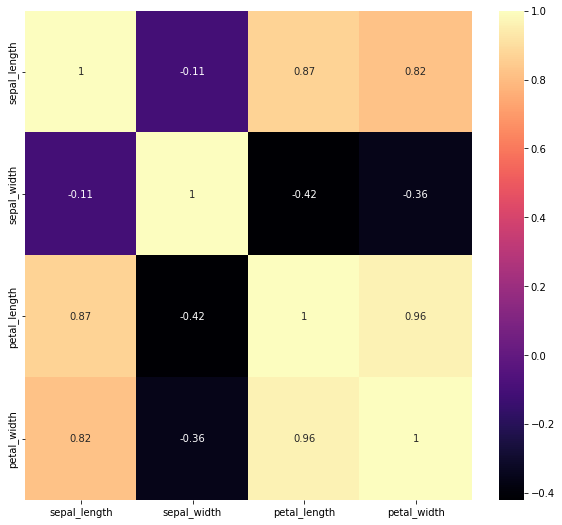

In [137]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,9))
sbn.heatmap(corr, annot=True, ax=ax, cmap = 'magma')

# Importing sklearn library and trimming data

In [138]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
Y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
L_R_model = LogisticRegression()

In [141]:
L_R_model.fit(x_train, y_train)
LogisticRegression()
print("Accuracy of the Logistics Regression_model: ",L_R_model.score(x_test, y_test) * 100)

Accuracy of the Logistics Regression_model:  92.10526315789474


# K Nearest Neighbour

In [142]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()

In [143]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [144]:
print("Accuracy for K-Nearest model: ",KNN_model.score(x_test, y_test) * 100)

Accuracy for K-Nearest model:  94.73684210526315


# Desicion Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
D_T_model = DecisionTreeClassifier()

In [146]:
D_T_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [147]:
print("Accuracy of Decision Tree model: ",D_T_model.score(x_test, y_test) * 100)

Accuracy of Decision Tree model:  92.10526315789474


# End of Task 1